In [ ]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [ ]:
customers = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/customers.csv')
properties = pd.read_csv('https://raw.githubusercontent.com/trisha00001/Data_Preprocessing/main/properties.csv ')

In [ ]:
customers.head(20)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
5,5,C0088,Individual,Yurem,Wright,3/6/1957,M,USA,California,Home,3,Yes,Website
6,6,C0079,Individual,Xavier,Faulkner,5/24/1947,M,Canada,NaN,Investment,5,No,Website
7,7,C0149,Individual,Kayden,Olsen,10/17/1969,F,USA,California,Home,5,No,Website
8,8,C0064,Individual,Joaquin,Mullins,10/5/1975,M,USA,California,Investment,5,No,Agency
9,9,C0068,Individual,Nicolas,Navarro,6/17/1966,M,USA,Oregon,Investment,3,No,Agency


In [ ]:
customers.tail(20)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
142,142,C0130,Individual,Ezra,Lozano,2/24/1958,M,USA,California,Home,1,No,Website
143,143,C0044,Individual,Ramiro,Oneill,9/29/1954,M,USA,California,Home,4,No,Agency
144,144,C0056,Individual,Emely,Watts,11/30/1964,F,USA,California,Home,4,No,Website
145,145,C0077,Individual,Hazel,Ayers,2/1/1963,M,USA,Colorado,Home,2,No,Website
146,146,C0031,Individual,Cedric,Goodwin,2/20/1948,M,USA,Utah,Home,4,No,Client
147,147,C0072,Individual,Dayton,Hatfield,4/19/1969,M,USA,Colorado,Investment,4,Yes,Agency
148,148,C0063,Individual,Piotr,Aleksandrov,12/2/1955,M,Russia,NaN,Investment,3,No,Agency
149,149,C0017,Individual,Memphis,Mcconnell,8/25/1968,M,USA,California,Home,2,Yes,Website
150,150,C0009,Individual,Arabella,Ferrell,8/17/1976,F,USA,Oregon,Home,1,No,Agency
151,151,C0075,Individual,Sincere,Hansen,1/19/1967,F,USA,California,Investment,2,Yes,Agency


In [ ]:
properties

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...,...
262,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         162 non-null    int64 
 1   ﻿customerid        162 non-null    object
 2   entity             162 non-null    object
 3   name               162 non-null    object
 4   surname            162 non-null    object
 5   birth_date         155 non-null    object
 6   sex                155 non-null    object
 7   country            162 non-null    object
 8   state              154 non-null    object
 9   purpose            162 non-null    object
 10  deal_satisfaction  162 non-null    int64 
 11  mortgage           162 non-null    object
 12  source             162 non-null    object
dtypes: int64(2), object(11)
memory usage: 16.6+ KB


In [ ]:
customers.describe()

,Unnamed: 0,deal_satisfaction
count,162.000000,162.000000
mean,80.500000,3.456790
std,46.909487,1.333276
min,0.000000,1.000000
25%,40.250000,3.000000
50%,80.500000,4.000000
75%,120.750000,5.000000
max,161.000000,5.000000


In [ ]:
customers.shape

(162, 13)

# Предобработка данных

In [ ]:
print(customers.columns)

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')


In [ ]:
customers.dtypes

Unnamed: 0            int64
﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [ ]:

customers.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
customers


,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [ ]:
customers.columns = ['customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source']

In [ ]:
customers['customerid'] = customers['customerid'].str.replace('C', '')

In [ ]:
customers

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website
1,10,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website
2,132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency
3,137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website
4,174,Company,Marleez,Co,NaT,<NA>,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,Individual,Emmy,Singh,1979-12-03,F,USA,Virginia,Investment,3,Yes,Agency
158,138,Individual,Colin,Campos,1942-04-14,M,USA,California,Home,3,No,Website
159,113,Individual,Anya,Stephenson,1959-06-11,F,USA,California,Home,4,No,Website
160,147,Individual,Parker,Poole,1951-11-10,M,USA,California,Home,5,No,Website


In [ ]:
customers['customerid'] = customers['customerid'].astype('int64')
customers['name'] = customers['name'].astype('string')
customers['surname'] = customers['surname'].astype('string')
customers['entity'] = customers['entity'].astype('string')
customers['sex'] = customers['sex'].astype('string')
customers['country'] = customers['country'].astype('string')
customers['state'] = customers['state'].astype('string')
customers['purpose'] = customers['purpose'].astype('string')
customers['mortgage'] = customers['mortgage'].astype('string')
customers['source'] = customers['source'].astype('string')

In [ ]:
customers['birth_date'] = customers['birth_date'].astype('datetime64[ns]')

In [ ]:
customers.dtypes

,0
customerid,int64
entity,string[python]
name,string[python]
surname,string[python]
birth_date,datetime64[ns]
sex,string[python]
country,string[python]
state,string[python]
purpose,string[python]
deal_satisfaction,int64


In [ ]:

customers.rename(columns={'birth_date':'birthdate'}, inplace=True)

In [ ]:
categorical_cols = ['entity',  'sex', 'country', 'state',
       'purpose', 'mortgage', 'source']

In [ ]:
for col in categorical_cols:
  customers[col] = customers[col].str.lower()

In [ ]:
customers

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,individual,Kareem,Liu,1968-05-11,f,usa,california,home,4,yes,website
1,10,individual,Trystan,Oconnor,1962-11-26,m,usa,california,home,1,no,website
2,132,individual,Kale,Gay,1959-04-07,m,usa,california,home,4,yes,agency
3,137,individual,Russell,Gross,1959-11-25,m,usa,california,home,5,no,website
4,174,company,Marleez,Co,NaT,<NA>,usa,california,investment,5,no,website
...,...,...,...,...,...,...,...,...,...,...,...,...
157,170,individual,Emmy,Singh,1979-12-03,f,usa,virginia,investment,3,yes,agency
158,138,individual,Colin,Campos,1942-04-14,m,usa,california,home,3,no,website
159,113,individual,Anya,Stephenson,1959-06-11,f,usa,california,home,4,no,website
160,147,individual,Parker,Poole,1951-11-10,m,usa,california,home,5,no,website


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
print(customers['entity'].unique())

<StringArray>
['individual', 'company']
Length: 2, dtype: string


In [ ]:
customers['entity'].value_counts()

,count
entity,
individual,155
company,7


In [ ]:
customers['entity'] = label_encoder.fit_transform(customers['entity'])
print(customers['entity'].unique())

[1 0]


In [ ]:
customers['entity'].value_counts()

,count
entity,
1,155
0,7


In [ ]:
print(customers['sex'].unique())


<StringArray>
['f', 'm', <NA>]
Length: 3, dtype: string


In [ ]:
customers['sex'].value_counts()

,count
sex,
m,87
f,68
Unknown,7


In [ ]:
customers['sex'].fillna('Unknown', inplace=True)

In [ ]:
customers['sex'] = label_encoder.fit_transform(customers['sex'])
print(customers['sex'].unique())


[1 2 0]


In [ ]:
customers['sex'].value_counts()

,count
sex,
2,87
1,68
0,7


In [ ]:
customers['country'].unique()

<StringArray>
[    'usa',    'usa ',  'canada', 'germany', 'belgium',  'mexico',  'russia',
      'uk', 'denmark']
Length: 9, dtype: string

In [ ]:
customers['country'] = customers['country'].str.strip().str.lower()

In [ ]:
customers['country'].value_counts()

,count
country,
usa,150
russia,4
belgium,2
uk,2
canada,1
germany,1
mexico,1
denmark,1


In [ ]:
print(customers['country'].unique())


<StringArray>
['usa', 'canada', 'germany', 'belgium', 'mexico', 'russia', 'uk', 'denmark']
Length: 8, dtype: string


In [ ]:
customers['country'] = label_encoder.fit_transform(customers['country'])
print(customers['country'].unique())

[7 1 3 0 4 5 6 2]


In [ ]:
customers['country'].iloc[0]

7

In [ ]:
customers['country'].value_counts()

,count
country,
7,150
5,4
0,2
6,2
1,1
3,1
4,1
2,1


In [ ]:
print(customers['state'].unique())

<StringArray>
['california',         <NA>,     'oregon',    'arizona',     'nevada',
   'colorado',       'utah',   'virginia',    'wyoming',     'kansas']
Length: 10, dtype: string


In [ ]:
customers['state'].fillna('unknown',inplace=True)

In [ ]:
customers['state'].value_counts()

In [ ]:
customers['state'] = label_encoder.fit_transform(customers['state'])
print(customers['state'].unique())

[1 6 5 0 4 2 7 8 9 3]


In [ ]:
print(customers['purpose'].unique())

<StringArray>
['home', 'investment']
Length: 2, dtype: string


In [ ]:
customers['purpose'].value_counts()

purpose
home          112
investment     50
Name: count, dtype: Int64

In [ ]:
customers['purpose'] = label_encoder.fit_transform(customers['purpose'])
print(customers['purpose'].unique())

[0 1]


In [ ]:
customers['purpose'].value_counts()

,count
purpose,
0,112
1,50


In [ ]:

print(customers['mortgage'].unique())

<StringArray>
['yes', 'no']
Length: 2, dtype: string


In [ ]:
customers['mortgage'].value_counts()

,count
mortgage,
no,102
yes,60


In [ ]:
customers['mortgage'] = label_encoder.fit_transform(customers['mortgage'])
print(customers['mortgage'].unique())

[1 0]


In [ ]:
customers['purpose'].value_counts()

,count
purpose,
0,112
1,50


In [ ]:
print(customers['source'].unique())


<StringArray>
['website', 'agency', 'client']
Length: 3, dtype: string


In [ ]:
customers['source'].value_counts()

,count
source,
website,93
agency,54
client,15


In [ ]:
customers['source'] = label_encoder.fit_transform(customers['source'])
print(customers['source'].unique())

[2 0 1]


In [ ]:
customers['source'].value_counts()

,count
source,
2,93
0,54
1,15


In [ ]:
customers['customerid'].unique()

array([110,  10, 132, 137, 174,  88,  79, 149,  64,  68,   6,  55,  16,
       121,  74,  32,  93,  76, 165, 153, 129, 162,  71,  69,   5, 144,
        20, 101, 128,  33, 171,  95, 123,  15,  84,  19,  53,  80,  70,
        51,  22, 127,  81, 104,  73, 168, 169,  39,  86,  36,  45, 105,
       119,  12,  65,  54, 172,  29,  98, 142, 135,  37, 134,  91,  18,
        85,  61,  66, 156,  43, 112, 145,  47,  82,   7,  52,  41,   4,
       118,  30, 154, 125, 115,  78, 151, 111,  14, 103,  24, 166,  67,
       122, 107,   3,  99, 160,  13,  59, 120, 150, 140,   2,  96, 159,
       163, 100, 155,  49, 148, 146,  34, 141,   8, 131,  89, 157, 114,
       124, 158, 175,  23, 164,  58,  62,  42,  48,  83,  25,  87,  94,
        38,  11, 139,  21, 106,  40,  35, 126, 136, 109,  28,  57, 130,
        44,  56,  77,  31,  72,  63,  17,   9,  75,  27,  60,   1,  90,
       108, 170, 138, 113, 147, 133])

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    int64         
 1   entity             162 non-null    int64         
 2   name               162 non-null    string        
 3   surname            162 non-null    string        
 4   birthdate          155 non-null    datetime64[ns]
 5   sex                162 non-null    int64         
 6   country            162 non-null    int64         
 7   state              162 non-null    int64         
 8   purpose            162 non-null    int64         
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    int64         
 11  source             162 non-null    int64         
dtypes: datetime64[ns](1), int64(9), string(2)
memory usage: 15.3 KB


In [ ]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,110,1,Kareem,Liu,1968-05-11,1,7,1,0,4,1,2
1,10,1,Trystan,Oconnor,1962-11-26,2,7,1,0,1,0,2
2,132,1,Kale,Gay,1959-04-07,2,7,1,0,4,1,0
3,137,1,Russell,Gross,1959-11-25,2,7,1,0,5,0,2
4,174,0,Marleez,Co,NaT,0,7,1,1,5,0,2


In [ ]:
# For customers dataframe
customers.isnull().sum()

,0
customerid,0
entity,0
name,0
surname,0
birthdate,7
sex,0
country,0
state,0
purpose,0
deal_satisfaction,0


In [ ]:
missing_percentage = (customers.isnull().mean() * 100).round(2)
print(missing_percentage)

customerid           0.00
entity               0.00
name                 0.00
surname              0.00
birthdate            4.32
sex                  0.00
country              0.00
state                0.00
purpose              0.00
deal_satisfaction    0.00
mortgage             0.00
source               0.00
dtype: float64


<Axes: >

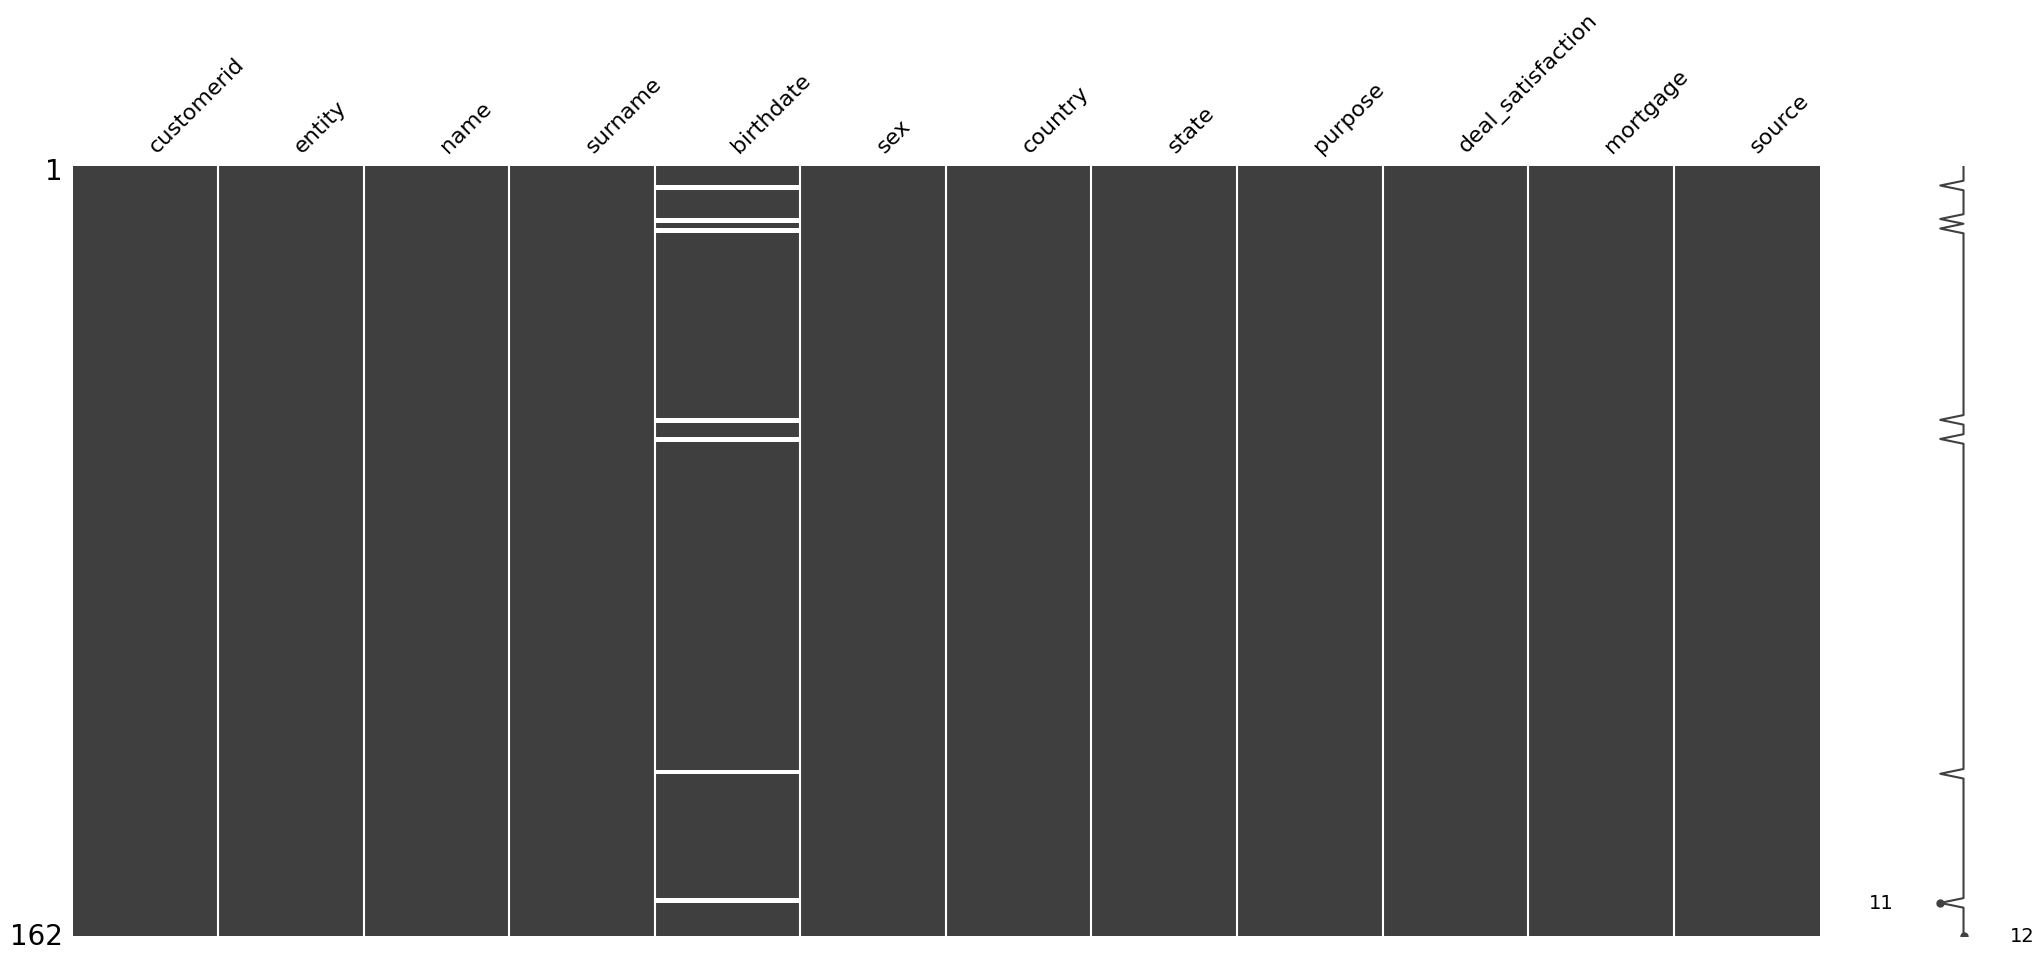

In [ ]:
msno.matrix(customers)

In [ ]:
customers.sort_values(by='birthdate', inplace=True)
customers['birthdate'].fillna(method='ffill', inplace=True)

In [ ]:
customers.shape

(162, 12)

In [ ]:
customers.head()

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source
43,104,1,Diana,Hunt,1931-02-13,1,7,0,0,3,0,2
133,21,1,Kaylin,Villarreal,1932-06-13,1,5,6,1,3,0,2
108,148,1,Myah,Roman,1933-05-05,1,7,1,1,5,1,0
56,172,1,Henry,Kennedy,1933-06-08,2,7,1,0,4,1,0
87,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2


In [ ]:
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  267 non-null    int64  
 1   ﻿id         267 non-null    int64  
 2   building    267 non-null    int64  
 3   date_sale   267 non-null    object 
 4   type        267 non-null    object 
 5   property#   267 non-null    int64  
 6   area        267 non-null    float64
 7   price       267 non-null    object 
 8   status      267 non-null    object 
 9   customerid  195 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.0+ KB


In [ ]:
print(properties.columns)

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')


In [ ]:
properties.describe()

,Unnamed: 0,﻿id,building,property#,area
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,133.000000,2975.142322,2.947566,27.580524,936.221311
std,77.220464,1392.197474,1.391794,15.361437,284.894858
min,0.000000,1002.000000,1.000000,1.000000,410.710000
25%,66.500000,2015.500000,2.000000,14.500000,756.210000
50%,133.000000,3024.000000,3.000000,28.000000,798.280000
75%,199.500000,4031.500000,4.000000,40.000000,1121.950000
max,266.000000,5052.000000,5.000000,59.000000,1942.500000


In [ ]:
properties.shape

(267, 10)

In [ ]:

properties['customerid'] = properties['customerid'].str.replace('C', '')

In [ ]:
properties.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
properties.rename(columns={'﻿id': 'id'}, inplace=True)

In [ ]:

properties.drop(columns=['id'], inplace=True)

In [ ]:
properties.dtypes

building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [ ]:
properties['customerid'].unique()

array([' 0028 ', ' 0027 ', ' 0112 ', ' 0160 ', ' 0014 ', ' 0125 ',
       ' 0166 ', ' 0034 ', ' 0170 ', ' 0009 ', ' 0041 ', ' 0057 ',
       ' 0061 ', ' 0089 ', ' 0159 ', ' 0171 ', ' 0042 ', ' 0093 ',
       ' 0051 ', ' 0064 ', ' 0128 ', ' 0019 ', ' 0037 ', ' 0127 ',
       ' 0018 ', ' 0040 ', ' 0080 ', ' 0083 ', ' 0085 ', ' 0091 ',
       ' 0007 ', ' 0048 ', ' 0065 ', ' 0096 ', ' 0164 ', ' 0038 ',
       ' 0087 ', ' 0142 ', ' 0015 ', ' 0122 ', ' 0017 ', ' 0020 ',
       ' 0086 ', ' 0150 ', ' 0156 ', ' 0169 ', ' 0022 ', ' 0072 ',
       ' 0136 ', ' 0149 ', ' 0011 ', ' 0073 ', ' 0110 ', ' 0111 ',
       ' 0123 ', ' 0070 ', ' 0075 ', ' 0076 ', ' 0105 ', ' 0135 ',
       ' 0153 ', ' 0047 ', ' 0060 ', ' 0066 ', ' 0068 ', ' 0090 ',
       ' 0095 ', ' 0151 ', ' 0162 ', ' 0010 ', ' 0054 ', ' 0056 ',
       ' 0081 ', ' 0084 ', ' 0016 ', ' 0035 ', ' 0062 ', ' 0099 ',
       ' 0114 ', ' 0006 ', ' 0053 ', ' 0069 ', ' 0077 ', ' 0168 ',
       ' 0058 ', ' 0107 ', ' 0131 ', ' 0144 ', ' 0098 ', ' 013

In [ ]:
properties['customerid'] = properties['customerid'].str.replace(r'\D', '', regex=True)
properties['customerid'] = properties['customerid'].astype(float).astype('Int64')  # Convert to Nullable Integer


In [ ]:
# Define the list of possible imputation values
impute_values = [110, 10, 132, 137, 174, 88, 79, 149, 64, 68, 6, 55, 16, 121, 74, 32, 93, 76, 165, 153, 129, 162, 71, 69, 5, 144, 20, 101, 128, 33, 171, 95, 123, 15, 84, 19, 53, 80, 70, 51, 22, 127, 81, 104, 73, 168, 169, 39, 86, 36, 45, 105, 119, 12, 65, 54, 172, 29, 98, 142, 135, 37, 134, 91, 18, 85, 61, 66, 156, 43, 112, 145, 47, 82, 7, 52, 41, 4, 118, 30, 154, 125, 115, 78, 151, 111, 14, 103, 24, 166, 67, 122, 107, 3, 99, 160, 13, 59, 120, 150, 140, 2, 96, 159, 163, 100, 155, 49, 148, 146, 34, 141, 8, 131, 89, 157, 114, 124, 158, 175, 23, 164, 58, 62, 42, 48, 83, 25, 87, 94, 38, 11, 139, 21, 106, 40, 35, 126, 136, 109, 28, 57, 130, 44, 56, 77, 31, 72, 63, 17, 9, 75, 27, 60, 1, 90, 108, 170, 138, 113, 147, 133]

# Iterate through the DataFrame to replace NaN values
for value in impute_values:
    properties['customerid'].fillna(value=value, inplace=True)

# If there are still NaN values left, you can fill them with a default value, for example, -1
properties['customerid'].fillna(value=-1, inplace=True)

In [ ]:
properties['customerid'].unique()

<IntegerArray>
[ 28,  27, 112, 160,  14, 125, 166,  34, 170,   9,
 ...
 148, 172, 104,   1,  12,  25,  29,  55, 121, 174]
Length: 162, dtype: Int64

In [ ]:

properties['type'] = properties['type'].astype('string')
properties['status'] = properties['status'].astype('string')

In [ ]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'], format='%m/%d/%Y', errors='coerce')

In [ ]:

properties['price'] = properties['price'].str.replace('$','').str.replace(',','').astype('float64')

In [ ]:
properties.rename(columns={'property#':'property','date_sale':'datesale'},inplace=True )

In [ ]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
0,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,28
1,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,27
2,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,112
3,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,160
4,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,14
5,3,2007-09-01,Apartment,11,675.19,203491.85,Sold,125
6,3,2007-09-01,Apartment,26,670.89,212520.83,Sold,125
7,3,2008-01-01,Apartment,23,720.81,198591.85,Sold,166
8,1,2006-06-01,Apartment,31,782.25,265467.68,Sold,34
9,4,2006-03-01,Apartment,23,794.52,235633.26,Sold,170


In [ ]:
properties.dtypes

building               int64
datesale      datetime64[ns]
type          string[python]
property               int64
area                 float64
price                float64
status        string[python]
customerid             Int64
dtype: object

In [ ]:
categorical_cols = ['status', 'type']

In [ ]:
properties['status'] = properties['status'].str.lower()

In [ ]:
properties['status'].unique()

<StringArray>
[' sold ', '-']
Length: 2, dtype: string

In [ ]:
properties['status'] = properties['status'].replace('-', 'unknown')


In [ ]:
properties['status'].value_counts()

,count
status,
sold,195
unknown,72


In [ ]:
properties['status'] = label_encoder.fit_transform(properties['status'])

In [ ]:
properties['status'].value_counts()

,count
status,
0,195
1,72


In [ ]:
properties['status'].unique()

array([0, 1])

In [ ]:
properties['type'] = properties['type'].str.lower()

In [ ]:
properties['type'].unique()

<StringArray>
['apartment', 'office']
Length: 2, dtype: string

In [ ]:
properties['type'].value_counts()

,count
type,
apartment,259
office,8


In [ ]:

properties['type'] = label_encoder.fit_transform(properties['type'])

In [ ]:
properties['type'].value_counts()

,count
type,
0,259
1,8


In [ ]:
properties.head(10)

,building,date_sale,type,property#,area,price,status,customerid
0,1,2005-11-01,0,30,743.09,"$246,172.68",0,28
1,1,2005-10-01,0,29,756.21,"$246,331.90",0,27
2,2,2007-07-01,0,2,587.28,"$209,280.91",0,112
3,2,2007-12-01,0,31,1604.75,"$452,667.01",0,160
4,1,2004-11-01,0,49,1375.45,"$467,083.31",0,14
5,3,2007-09-01,0,11,675.19,"$203,491.85",0,125
6,3,2007-09-01,0,26,670.89,"$212,520.83",0,125
7,3,2008-01-01,0,23,720.81,"$198,591.85",0,166
8,1,2006-06-01,0,31,782.25,"$265,467.68",0,34
9,4,2006-03-01,0,23,794.52,"$235,633.26",0,170


In [ ]:
properties.isna().sum()

,0
building,0
date_sale,72
type,0
property#,0
area,0
price,0
status,0
customerid,0


<Axes: >

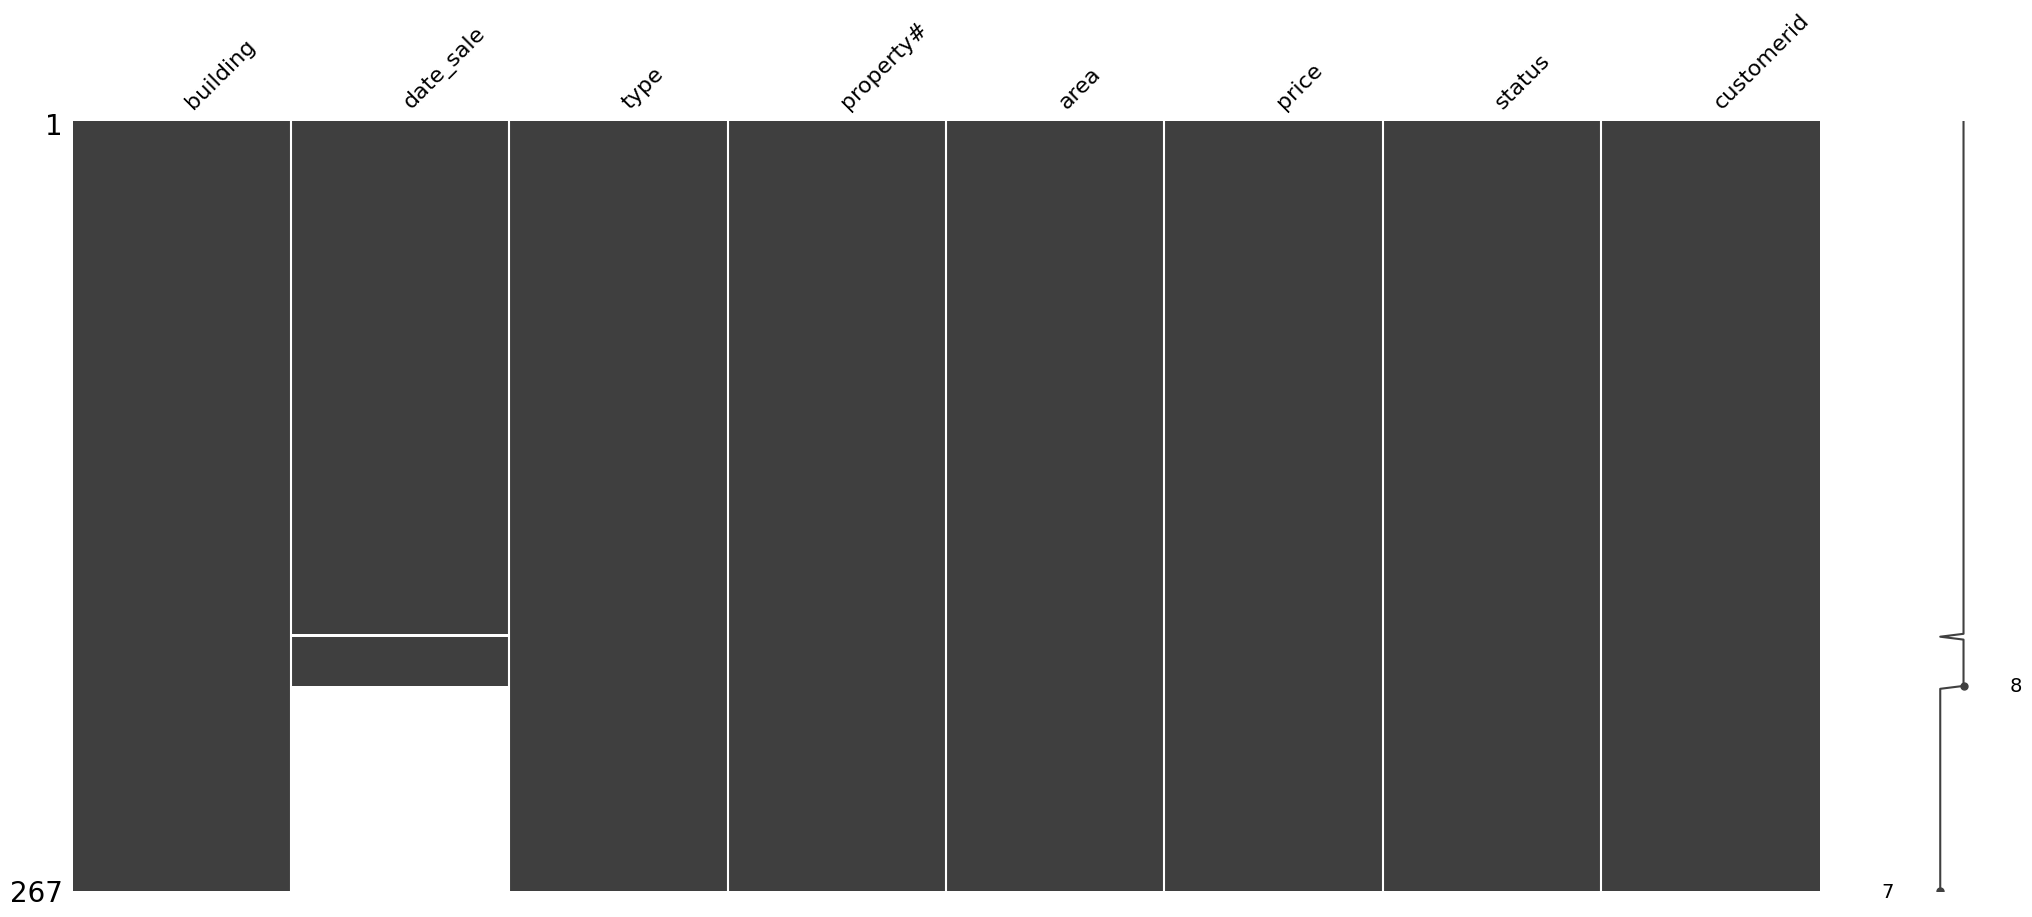

In [ ]:
msno.matrix(properties)

In [ ]:
missing_values = ((properties.isna().sum() * 100)/ properties.shape[0]).round()

In [ ]:
print(missing_values)

building       0.0
date_sale     27.0
type           0.0
property#      0.0
area           0.0
price          0.0
status         0.0
customerid     0.0
dtype: float64


In [ ]:
properties.sort_values(by='datesale', inplace=True)

In [ ]:
properties['datesale'].fillna(method='ffill', inplace=True)

<ipython-input-93-c60183564ce6>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  properties['datesale'].fillna(method='ffill', inplace=True)


In [ ]:
properties.head(10)

,building,datesale,type,property,area,price,status,customerid
137,1,2004-03-01,1,2,1238.58,410932.67,0,2
186,2,2004-03-01,0,1,587.28,169158.29,0,121
179,1,2004-03-01,1,5,410.71,117564.07,0,1
132,1,2004-06-01,0,44,827.87,229464.71,0,3
133,1,2004-06-01,0,43,1160.36,377313.56,0,4
83,1,2004-08-01,0,38,743.09,207581.43,0,6
164,1,2004-08-01,0,33,1434.09,412856.56,0,5
33,1,2004-10-01,0,18,625.80,191389.87,0,7
53,1,2004-10-01,0,35,827.87,238811.06,0,11
72,1,2004-10-01,0,45,756.21,248525.12,0,10


In [ ]:
properties.isna().sum()

,0
building,0
datesale,0
type,0
property,0
area,0
price,0
status,0
customerid,0


In [ ]:
properties['customerid']

137      2
186    121
179      1
132      3
133      4
      ... 
262    110
263    110
264    110
265    110
266    110
Name: customerid, Length: 267, dtype: Int64

In [ ]:
# Assuming 'customers' and 'properties' are your DataFrames
common_customer_ids = set(customers['customerid']).intersection(properties['customerid'])

if common_customer_ids:
    print("Common customer IDs found:")
    print(common_customer_ids)
else:
    print("No common customer IDs found.")

Common customer IDs found:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 175}


In [ ]:

data  = customers.merge(properties, on='customerid', how='outer')

In [ ]:
data.shape

(267, 19)

In [ ]:
data.head(20)

,customerid,entity,name,surname,birthdate,sex,country,state,purpose,deal_satisfaction,mortgage,source,building,datesale,type,property,area,price,status
0,104,1,Diana,Hunt,1931-02-13,1,7,0,0,3,0,2,3,2007-06-01,0,25,923.21,296483.14,0
1,21,1,Kaylin,Villarreal,1932-06-13,1,5,6,1,3,0,2,1,2005-04-01,0,23,782.25,261579.89,0
2,148,1,Myah,Roman,1933-05-05,1,7,1,1,5,1,0,3,2006-05-01,0,9,743.41,222867.42,0
3,172,1,Henry,Kennedy,1933-06-08,2,7,1,0,4,1,0,3,2006-03-01,0,52,923.21,291494.36,0
4,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2,3,2007-06-01,0,40,670.89,204292.49,0
5,103,1,Jamal,Mueller,1936-08-13,2,7,5,1,2,0,2,3,2007-06-01,0,8,697.89,219865.76,0
6,5,1,Rodolfo,Gibson,1937-01-20,2,7,4,0,2,1,2,1,2004-08-01,0,33,1434.09,412856.56,0
7,129,1,Jesus,Obrien,1938-06-09,2,7,5,1,3,0,2,3,2007-10-01,0,48,781.07,249075.66,0
8,129,1,Jesus,Obrien,1938-06-09,2,7,5,1,3,0,2,3,2007-10-01,0,12,781.07,210824.06,0
9,115,1,Issac,Edwards,1938-10-29,2,7,1,0,5,0,2,3,2007-08-01,0,2,923.21,261871.70,0


In [ ]:
data.dtypes

customerid                    int64
entity                        int64
name                 string[python]
surname              string[python]
birthdate            datetime64[ns]
sex                           int64
country                       int64
state                         int64
purpose                       int64
deal_satisfaction             int64
mortgage                      int64
source                        int64
building                      int64
datesale             datetime64[ns]
type                          int64
property                      int64
area                        float64
price                       float64
status                        int64
dtype: object

In [ ]:

data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
data = read_csv('preprocessed_data.csv')

In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,267.0,95.11985,1.0,64.0,110.0,116.5,175.0,44.340708
entity,267.0,0.93633,0.0,1.0,1.0,1.0,1.0,0.244623
birthdate,267,1964-08-14 20:02:41.797752800,1931-02-13 00:00:00,1958-03-21 00:00:00,1968-05-11 00:00:00,1969-08-09 12:00:00,1986-06-21 00:00:00,NaN
sex,267.0,1.340824,0.0,1.0,1.0,2.0,2.0,0.594413
country,267.0,6.707865,0.0,7.0,7.0,7.0,7.0,1.21892
state,267.0,1.872659,0.0,1.0,1.0,1.0,9.0,1.881519
purpose,267.0,0.284644,0.0,0.0,0.0,1.0,1.0,0.452092
deal_satisfaction,267.0,3.707865,1.0,3.0,4.0,5.0,5.0,1.158839
mortgage,267.0,0.501873,0.0,0.0,1.0,1.0,1.0,0.500935
source,267.0,1.494382,0.0,1.0,2.0,2.0,2.0,0.833377


In [ ]:
building_types = data['building'].unique()

In [ ]:
print(building_types)

[3 1 5 2 4]


In [ ]:
totals_columns = ['building', 'price', 'mortgage']

In [ ]:
totals_df = data[totals_columns]
totals_df

,building,price,mortgage
0,3,296483.14,0
1,1,261579.89,0
2,3,222867.42,1
3,3,291494.36,1
4,3,204292.49,0
...,...,...,...
262,1,317196.40,0
263,1,246050.40,1
264,1,250312.53,1
265,1,222947.21,1


In [ ]:

# Group totals by building type and aggregate
totals_by_building = totals_df.groupby('building').sum()

In [ ]:
totals_by_building

,price,mortgage
building,,
1,14307448.61,20
2,16339725.35,21
3,17668429.10,25
4,12480299.17,29
5,14276995.44,39


In [ ]:
totals_by_building = totals_df.groupby('building').mean()

In [ ]:
totals_by_building

,price,mortgage
building,,
1,275143.242500,0.384615
2,286661.848246,0.368421
3,280451.255556,0.396825
4,290239.515581,0.674419
5,274557.604615,0.750000


In [ ]:
totals_avg = ['building','area','price','deal_satisfaction']

In [ ]:
totals_avg_df = data[totals_avg]
totals_avg_df

,building,area,price,deal_satisfaction
0,3,923.21,296483.14,3
1,1,782.25,261579.89,3
2,3,743.41,222867.42,5
3,3,923.21,291494.36,4
4,3,670.89,204292.49,2
...,...,...,...,...
262,1,1200.82,317196.40,5
263,1,775.69,246050.40,1
264,1,775.69,250312.53,1
265,1,827.87,222947.21,5


In [ ]:

averages_by_building = totals_avg_df.groupby('building').mean()
averages_by_building

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.673077
2,943.891930,286661.848246,3.543860
3,927.852381,280451.255556,3.634921
4,974.720930,290239.515581,3.930233
5,914.298654,274557.604615,3.826923


In [ ]:
# Display the results
print("Total Properties Sold and Mortgaged by Building Type:")
print(totals_by_building)

print("\nAverage Area, Price, and Deal Satisfaction by Building Type:")
print(averages_by_building)


Total Properties Sold and Mortgaged by Building Type:
                  price  mortgage
building                         
1         275143.242500  0.384615
2         286661.848246  0.368421
3         280451.255556  0.396825
4         290239.515581  0.674419
5         274557.604615  0.750000

Average Area, Price, and Deal Satisfaction by Building Type:
                area          price  deal_satisfaction
building                                              
1         928.038846  275143.242500           3.673077
2         943.891930  286661.848246           3.543860
3         927.852381  280451.255556           3.634921
4         974.720930  290239.515581           3.930233
5         914.298654  274557.604615           3.826923


In [ ]:
# Select columns of interest
totals_columns = ['country', 'price', 'mortgage']

In [ ]:

country_totals_df = data[totals_columns]

In [ ]:
totals_by_county = country_totals_df.groupby('country').sum()

In [ ]:
totals_avg = ['country','area','price','deal_satisfaction']

In [ ]:
country_avg_df = data[totals_avg]

In [ ]:

averages_by_country = country_avg_df.groupby('country').mean()

In [ ]:
# Display the results
print("Total Properties Sold and Mortgaged by Country:")
print(totals_by_county)
print("Averages by Country:")
print(averages_by_country)

Total Properties Sold and Mortgaged by Country:
               price  mortgage
country                       
0          458150.94         0
1         1918485.69         0
2          257183.48         0
3          205098.21         0
4          338181.18         0
5         1115315.34         1
6          440285.36         0
7        70340197.47       133
Averages by Country:
                area          price  deal_satisfaction
country                                               
0         852.730000  229075.470000           3.000000
1         917.382857  274069.384286           5.000000
2         785.480000  257183.480000           1.000000
3         743.410000  205098.210000           5.000000
4        1283.450000  338181.180000           3.000000
5         903.757500  278828.835000           2.500000
6         739.480000  220142.680000           4.000000
7         939.508514  282490.752892           3.702811


In [ ]:
print(data['state'].unique())

[0 6 1 5 4 7 2 8 9 3]


In [ ]:
# Select columns of interest
totals_columns = ['state', 'price', 'mortgage']

In [ ]:
# Create totals DataFrame
state_totals_df = data[totals_columns]

In [ ]:

# Group totals by state and aggregate
totals_by_state = state_totals_df.groupby('state').sum()

In [ ]:
# Display the results
print("Total Properties Sold and Mortgaged by State:")
print(totals_by_state)

Total Properties Sold and Mortgaged by State:
             price  mortgage
state                       
0       2854796.41         3
1      55974847.25       113
2       2570287.08         5
3        252185.99         0
4       4720038.60         8
5       2602526.55         1
6       3844575.97         1
7       1188776.40         1
8        860576.75         2
9        204286.67         0


In [ ]:

# Select columns of interest
average_columns = ['state','area' ,'price', 'deal_satisfaction']

In [ ]:
# Create totals DataFrame
state_avg_df = data[average_columns]

In [ ]:

# Group totals by state and aggregate
averages_by_state = state_avg_df.groupby('state').mean()

In [ ]:
# Display the results
print("Averages by State:")
print(averages_by_state)

Averages by State:
             area          price  deal_satisfaction
state                                              
0      841.627273  259526.946364           3.363636
1      971.615885  291535.662760           3.843750
2      777.010909  233662.461818           3.181818
3      923.210000  252185.990000           3.000000
4      921.692941  277649.329412           3.235294
5      766.954545  236593.322727           3.090909
6      920.563571  274612.569286           3.642857
7      814.986000  237755.280000           3.200000
8      730.712500  215144.187500           4.500000
9      701.660000  204286.670000           3.000000


In [ ]:

# Frequency distribution by state
frequency_by_state = data['state'].value_counts().reset_index()
frequency_by_state.columns = ['state', 'frequency']

In [ ]:
# Relative frequency by state
total_properties = len(data)
frequency_by_state['relative_frequency'] = frequency_by_state['frequency'] / total_properties

In [ ]:
# Cumulative frequency by state
frequency_by_state['cumulative_frequency'] = frequency_by_state['frequency'].cumsum()

In [ ]:
# Display the results
print("Frequency by State:")
print(frequency_by_state)

# Save the results to a CSV file, if needed
frequency_by_state.to_csv('frequency_by_state.csv', index=False)

Frequency by State:
   state  frequency  relative_frequency  cumulative_frequency
0      1        192            0.719101                   192
1      4         17            0.063670                   209
2      6         14            0.052434                   223
3      0         11            0.041199                   234
4      5         11            0.041199                   245
5      2         11            0.041199                   256
6      7          5            0.018727                   261
7      8          4            0.014981                   265
8      9          1            0.003745                   266
9      3          1            0.003745                   267


# Анализ данных

In [ ]:
# Calculate age at the time of sale
data['age_at_sale'] = ((data['datesale'] - data['birthdate']).dt.days /  365.25 ).round(0)
# Display the results
print(data[['birthdate', 'datesale', 'age_at_sale']])

     birthdate   datesale  age_at_sale
0   1931-02-13 2007-06-01         76.0
1   1932-06-13 2005-04-01         73.0
2   1933-05-05 2006-05-01         73.0
3   1933-06-08 2006-03-01         73.0
4   1936-08-13 2007-06-01         71.0
..         ...        ...          ...
262 1986-06-21 2004-11-01         18.0
263 1986-06-21 2005-12-01         19.0
264 1986-06-21 2005-12-01         19.0
265 1986-06-21 2005-09-01         19.0
266 1986-06-21 2004-03-01         18.0

[267 rows x 3 columns]


In [ ]:
# Define age intervals
age_intervals = [19.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 76.0, float('inf')]

In [ ]:
data['age_interval'] = pd.cut(data['age_at_sale'], bins=age_intervals, right=False)

In [ ]:
# Display the results
print(data[['birthdate', 'datesale', 'age_at_sale', 'age_interval']].head(20))

    birthdate   datesale  age_at_sale  age_interval
0  1931-02-13 2007-06-01         76.0   [76.0, inf)
1  1932-06-13 2005-04-01         73.0  [71.0, 76.0)
2  1933-05-05 2006-05-01         73.0  [71.0, 76.0)
3  1933-06-08 2006-03-01         73.0  [71.0, 76.0)
4  1936-08-13 2007-06-01         71.0  [71.0, 76.0)
5  1936-08-13 2007-06-01         71.0  [71.0, 76.0)
6  1937-01-20 2004-08-01         68.0  [65.0, 71.0)
7  1938-06-09 2007-10-01         69.0  [65.0, 71.0)
8  1938-06-09 2007-10-01         69.0  [65.0, 71.0)
9  1938-10-29 2007-08-01         69.0  [65.0, 71.0)
10 1938-10-29 2007-08-01         69.0  [65.0, 71.0)
11 1939-03-05 2007-06-01         68.0  [65.0, 71.0)
12 1939-06-30 2006-03-01         67.0  [65.0, 71.0)
13 1939-09-03 2006-02-01         66.0  [65.0, 71.0)
14 1940-03-05 2006-06-01         66.0  [65.0, 71.0)
15 1941-03-03 2006-09-01         65.0  [65.0, 71.0)
16 1941-08-19 2007-03-01         66.0  [65.0, 71.0)
17 1941-12-01 2007-08-01         66.0  [65.0, 71.0)
18 1941-12-0

In [ ]:
data['age_interval'].value_counts()

age_interval
[42.0, 48.0)    99
[36.0, 42.0)    28
[31.0, 36.0)    24
[48.0, 54.0)    24
[54.0, 59.0)    20
[19.0, 25.0)    17
[25.0, 31.0)    16
[65.0, 71.0)    16
[59.0, 65.0)    13
[71.0, 76.0)     5
[76.0, inf)      1
Name: count, dtype: int64

In [ ]:
# Group by age interval and count the number of sold properties
age_interval_counts = data[data['status'] == 1].groupby('age_interval').size().reset_index(name='properties_sold')

# Display the results
print(age_interval_counts)

    age_interval  properties_sold
0   [19.0, 25.0)                0
1   [25.0, 31.0)                0
2   [31.0, 36.0)                0
3   [36.0, 42.0)                0
4   [42.0, 48.0)               72
5   [48.0, 54.0)                0
6   [54.0, 59.0)                0
7   [59.0, 65.0)                0
8   [65.0, 71.0)                0
9   [71.0, 76.0)                0
10   [76.0, inf)                0


In [ ]:
# Create 10 bins for price intervals
data['price_interval'] = pd.cut(data['price'], bins=10)

# Display the results
print(data[['price', 'price_interval']])

         price            price_interval
0    296483.14  (285847.138, 327917.905]
1    261579.89  (243776.371, 285847.138]
2    222867.42  (201705.604, 243776.371]
3    291494.36  (285847.138, 327917.905]
4    204292.49  (201705.604, 243776.371]
..         ...                       ...
262  317196.40  (285847.138, 327917.905]
263  246050.40  (243776.371, 285847.138]
264  250312.53  (243776.371, 285847.138]
265  222947.21  (201705.604, 243776.371]
266  117564.07  (117143.362, 159634.837]

[267 rows x 2 columns]


In [ ]:
# Calculate covariance and correlation between properties and age
covariance = data['price'].cov(data['age_at_sale'])
correlation = data['price'].corr(data['age_at_sale'])

# Display the results
print(f'Covariance between price and age: {covariance}')
print(f'Correlation between price and age: {correlation}')

Covariance between price and age: -103312.47316676524
Correlation between price and age: -0.09288088627670645


# Визуализация

<ipython-input-638-a017d80b215e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')
<ipython-input-638-a017d80b215e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')


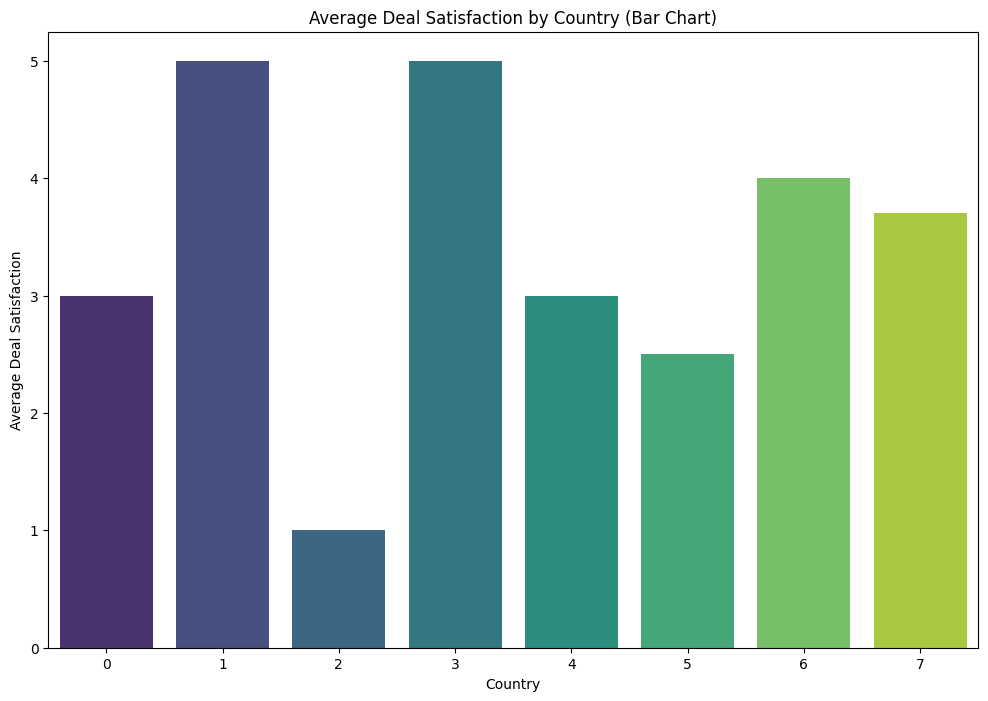

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='deal_satisfaction', data=data, ci=None, estimator=np.mean, palette='viridis')

plt.title('Average Deal Satisfaction by Country (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Average Deal Satisfaction')
plt.show()

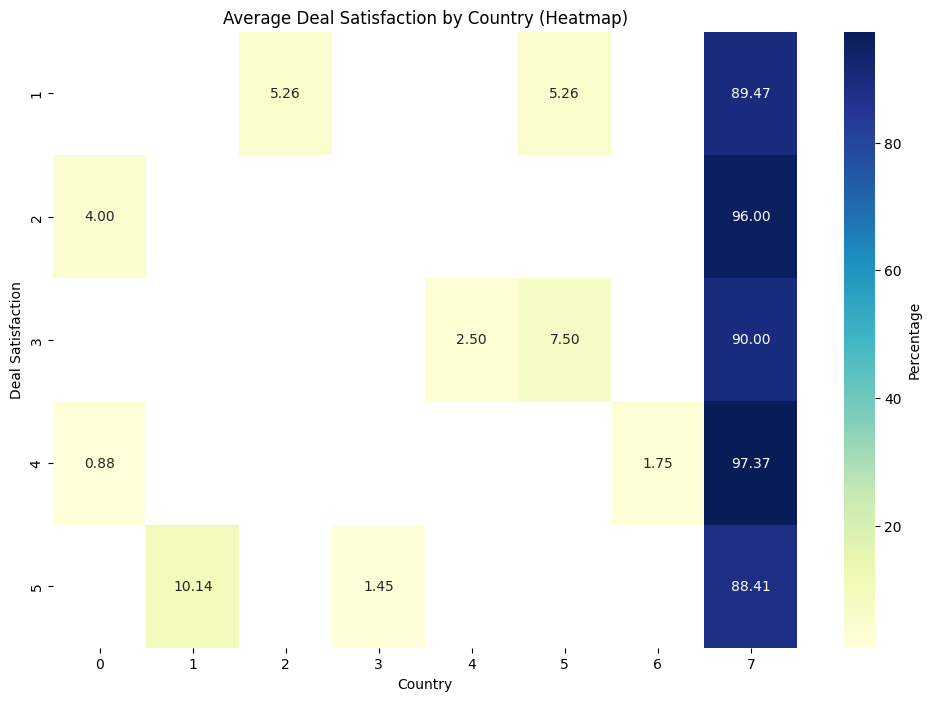

In [ ]:
heatmap_data = data.groupby(['country', 'deal_satisfaction']).size().unstack().T
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100  # Convert to percentages

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})

plt.title('Average Deal Satisfaction by Country (Heatmap)')
plt.xlabel('Country')
plt.ylabel('Deal Satisfaction')
plt.show()

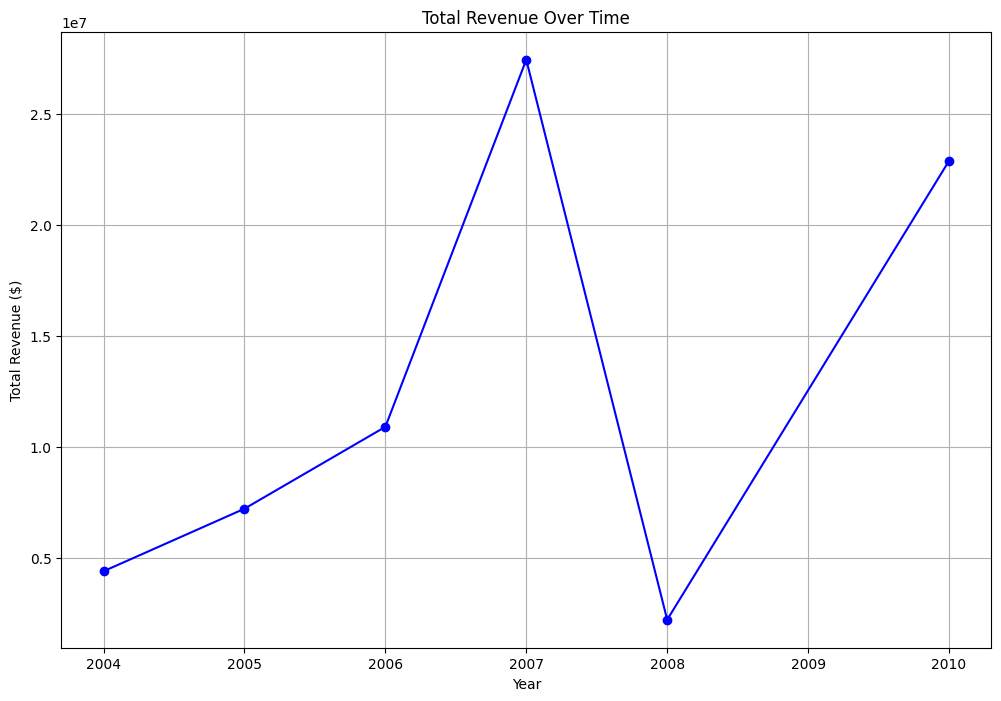

In [ ]:
plt.figure(figsize=(12, 8))
data['datesale_year'] = data['datesale'].dt.year
revenue_per_year = data.groupby('datesale_year')['price'].sum()

revenue_per_year.plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


<ipython-input-642-4037c921b9a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')


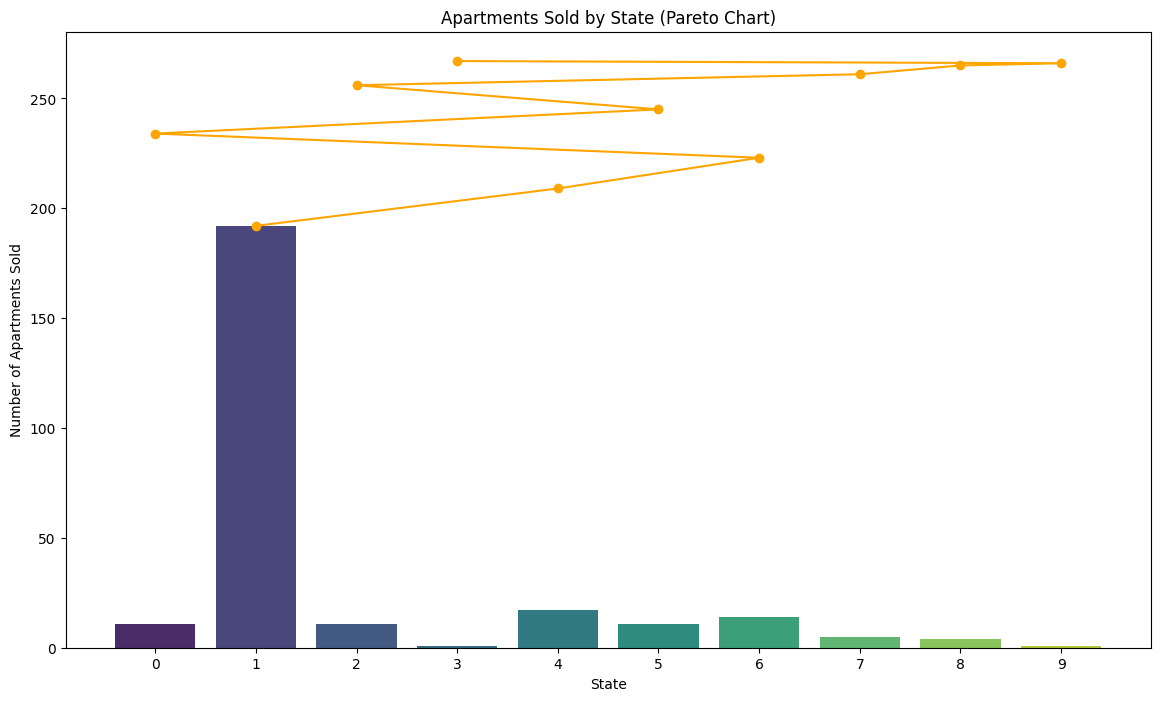

In [ ]:
plt.figure(figsize=(14, 8))
state_counts = data['state'].value_counts()
state_cumulative = state_counts.cumsum()

sns.barplot(x=state_counts.index, y=state_counts, palette='viridis')
plt.plot(state_cumulative.index, state_cumulative, color='orange', marker='o')

plt.title('Apartments Sold by State (Pareto Chart)')
plt.xlabel('State')
plt.ylabel('Number of Apartments Sold')
plt.show()

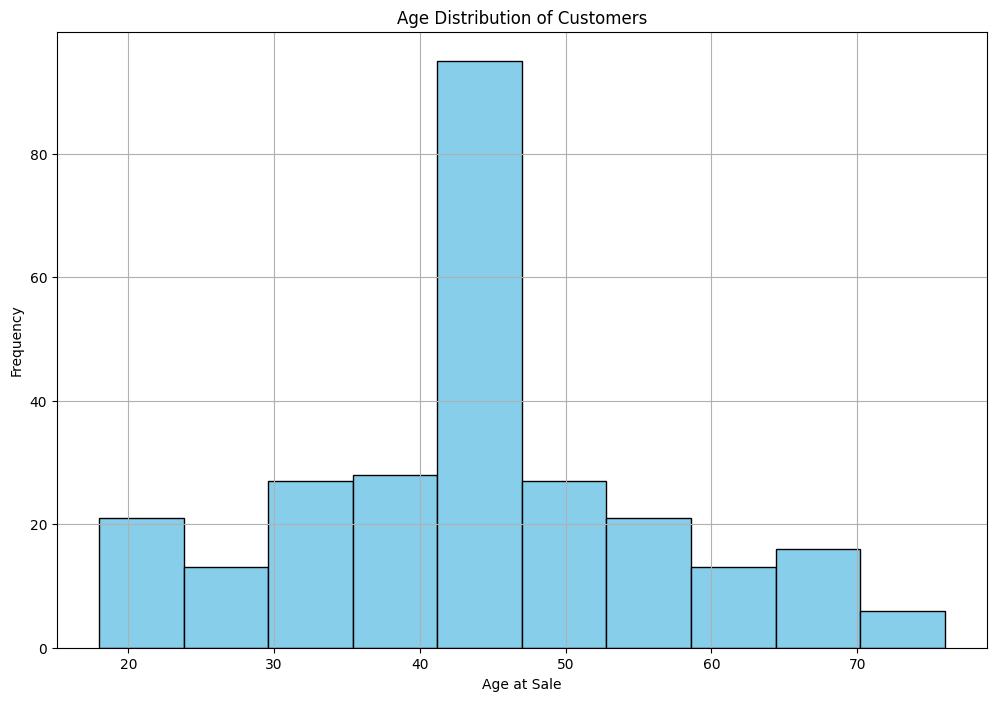

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(data['age_at_sale'], bins=10, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Customers')
plt.xlabel('Age at Sale')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

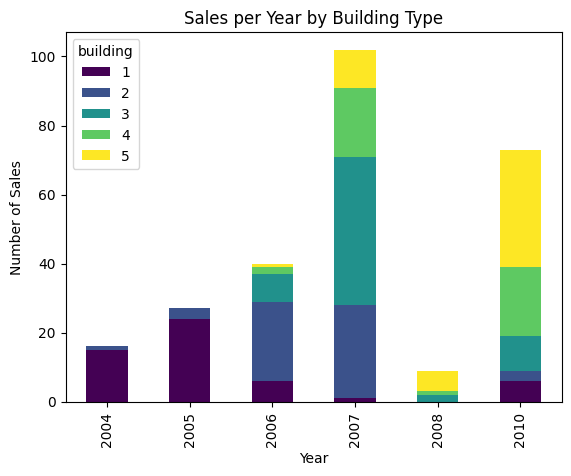

In [ ]:
plt.figure(figsize=(14, 8))
building_type_sales = data.groupby(['datesale_year', 'building'])['customerid'].count().unstack()

building_type_sales.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sales per Year by Building Type')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
# Filter data for building type 1
building_type_1_data = data[data['building'] == 1]

# Calculate the average area for building type 1
average_area_building_type_1 = building_type_1_data['area'].mean()

print(f"The average area of building type 1 is: {average_area_building_type_1} square feet")

The average area of building type 1 is: 928.0388461538464 square feet


In [ ]:
property_type_counts = data['type'].value_counts()
(print(property_type_counts))
# Find the property type with the highest count
most_common_property_type = property_type_counts.idxmax()

print(f"The most common property type sold is: {most_common_property_type}")

type
0    259
1      8
Name: count, dtype: int64
The most common property type sold is: 0


In [ ]:
# Group by building and calculate the average property price
average_price_by_building = data.groupby('building')['price'].mean()

# Find the building with the highest average price
highest_avg_price_building = average_price_by_building.idxmax()

print(f"The building with the highest average property price is: {highest_avg_price_building}")

The building with the highest average property price is: 4


In [ ]:
# 4 is the actual encoded value for Mexico in the 'country' column
mexico_properties = data[data['country'] == 4]

# Calculate the average cost of a building in Mexico
average_cost_in_mexico = mexico_properties['price'].mean()

print(f"The average cost of a building in Mexico is: {average_cost_in_mexico}")

The average cost of a building in Mexico is: 338181.18


In [ ]:

state_property_counts = data['state'].value_counts()

# Find the second-highest number of properties sold
second_highest_state = state_property_counts.index[1]

print("State with the second-highest number of properties sold:", second_highest_state)

State with the second-highest number of properties sold: 4


In [ ]:
# Define the price intervals
price_intervals = pd.cut(data['price'], bins=10)

# Count the number of unsold properties in the last interval
unsold_properties_last_interval = data[data['status'] == 0]['price'][price_intervals == price_intervals.iloc[-1]].count()

print("Number of unsold properties in the last interval:", unsold_properties_last_interval)

Number of unsold properties in the last interval: 2
